In [1]:
import csv
import numpy as np
import os
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [2]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # 我们假设这不是一个df，而是一个 Series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # 将 bytes 转化成 megabytes
    return "{:03.2f} MB".format(usage_mb)

def optimize_mem(sll):
    print(mem_usage(sll))
    sll_int = sll.select_dtypes(include=['int']) # 用 DataFrame.select_dtypes 来选中表中的 int数据
    converted_int = sll_int.apply(pd.to_numeric,downcast='unsigned') # 用pd.to_numeric()来降低我们的数据类型

    compare_ints = pd.concat([sll_int.dtypes,converted_int.dtypes],axis=1)
    compare_ints.columns = ['before','after']
    
    sll_float = sll.select_dtypes(include=['float'])
    converted_float = sll_float.apply(pd.to_numeric,downcast='float')

    compare_floats = pd.concat([sll_float.dtypes,converted_float.dtypes],axis=1)
    compare_floats.columns = ['before','after']
    
    sll[converted_int.columns] = converted_int
    sll[converted_float.columns] = converted_float

    print(mem_usage(sll))
    return sll

In [3]:
with open('user_app_actived.pkl','rb') as f:
    user_app_actived = pickle.load(f)

In [4]:
print(user_app_actived.info(memory_usage='deep'))
user_app_actived.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2512500 entries, 0 to 2512499
Columns: 142 entries, uId to top100_app_99
dtypes: float32(140), uint16(1), uint32(1)
memory usage: 1.3 GB
None


,uId,app_numbers,categery_0,categery_1,categery_2,categery_3,categery_4,categery_5,categery_6,categery_7,...,top100_app_90,top100_app_91,top100_app_92,top100_app_93,top100_app_94,top100_app_95,top100_app_96,top100_app_97,top100_app_98,top100_app_99
0,1000008,45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1000010,44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022727,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1000011,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1000013,41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.024390,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1000014,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018519,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
app_info = pd.read_csv('./csv_data/app_info.csv',header=None)
app_info.columns = ['appId','category']
user_basic_info = pd.read_csv('./csv_data/user_basic_info.csv',header=None)
user_basic_info.columns = ['uId','gender','city','prodName',
                           'ramCapacity','ramLeftRation','romCapacity',
                           'romLeftRation','color','fontSize',
                           'ct','carrier','os']
user_behavior_info = pd.read_csv('./csv_data/user_behavior_info.csv',header=None)
user_behavior_info.columns = ['uId','bootTimes','AFuncTimes','BFuncTimes',
                              'CFuncTimes','DFuncTimes','EFuncTimes',
                              'FFuncTimes','FFuncSum']
app_info = pd.get_dummies(app_info,columns=['category'])
del user_basic_info['city']
user_basic_info = pd.get_dummies(user_basic_info,columns=['prodName','color','ct','carrier'])

In [6]:
print(user_basic_info.info(memory_usage='deep'))
user_basic_info.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512500 entries, 0 to 2512499
Columns: 382 entries, uId to carrier_othercp
dtypes: float64(6), int64(2), uint8(374)
memory usage: 1.0 GB
None


,uId,gender,ramCapacity,ramLeftRation,romCapacity,romLeftRation,fontSize,os,prodName_p001,prodName_p0010,...,ct_2g#wifi,ct_3g,ct_3g#wifi,ct_4g,ct_4g#wifi,ct_wifi,carrier_China_Mobile,carrier_China_Telecom,carrier_China_Unicom,carrier_othercp
0,1000001,0,3.0,0.43,32.0,0.46,1.15,8.0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,1000002,1,NaN,0.26,NaN,0.59,1.00,9.0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,1000004,1,3.0,0.36,32.0,0.09,1.00,8.0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,1000006,0,2.0,0.19,16.0,0.42,NaN,6.0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1000007,1,6.0,0.20,137.0,0.50,1.00,9.0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [7]:
print(user_behavior_info.info(memory_usage='deep'))
user_behavior_info.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512500 entries, 0 to 2512499
Data columns (total 9 columns):
uId           int64
bootTimes     int64
AFuncTimes    float64
BFuncTimes    float64
CFuncTimes    float64
DFuncTimes    float64
EFuncTimes    float64
FFuncTimes    float64
FFuncSum      int64
dtypes: float64(6), int64(3)
memory usage: 172.5 MB
None


,uId,bootTimes,AFuncTimes,BFuncTimes,CFuncTimes,DFuncTimes,EFuncTimes,FFuncTimes,FFuncSum
0,1000001,108,0.0,0.00,1.00,0.07,0.0,0.0,3319
1,1000002,14,0.0,0.17,4.93,1.23,3.9,1.0,245
2,1000003,13,1.0,0.00,7.73,3.00,1.7,0.0,5987
3,1000004,57,0.0,0.03,1.37,0.63,0.0,0.0,7460
4,1000005,0,0.0,0.00,0.00,0.00,0.0,0.0,0


In [8]:
with open('user_app_usage.pkl','rb') as f:
    user_app_usage = pickle.load(f)

In [9]:
print(user_app_usage.info(memory_usage='deep'))
user_app_usage.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992667 entries, 0 to 1992666
Columns: 405 entries, uId to weekendTimesSum
dtypes: float32(404), uint32(1)
memory usage: 3.0 GB
None


,uId,weekdayDuration_0,weekdayDuration_1,weekdayDuration_2,weekdayDuration_3,weekdayDuration_4,weekdayDuration_5,weekdayDuration_6,weekdayDuration_7,weekdayDuration_8,...,weekendTimes_92,weekendTimes_93,weekendTimes_94,weekendTimes_95,weekendTimes_96,weekendTimes_97,weekendTimes_98,weekendTimes_99,weekdayTimesSum,weekendTimesSum
0,1000001,51048.0,0.0,71360.0,0.0,0.0,684.0,2868.0,439.0,503.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8444.0,2469.0
1,1000002,66900.0,187.0,0.0,29871.0,13269.0,17369.0,0.0,0.0,15433.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11054.0,4712.0
2,1000003,61716.0,3123.0,3178.0,8692.0,10999.0,44011.0,26517.0,174.0,39.0,...,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,11313.0,4542.0
3,1000004,144179.0,4952.0,9822.0,19898.0,0.0,0.0,0.0,12201.0,1253.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28382.0,7925.0
4,1000007,36751.0,5212.0,1144.0,22951.0,8334.0,4515.0,0.0,401.0,2644.0,...,0.0,2.0,0.0,0.0,669.0,0.0,0.0,0.0,19234.0,6031.0


In [10]:
join_data = pd.merge(user_behavior_info,user_basic_info,on=['uId'],how='inner')
print(len(join_data))
join_data = pd.merge(join_data,user_app_actived,on=['uId'],how='inner')
print(len(join_data))
join_data = pd.merge(join_data,user_app_usage,on=['uId'],how='inner')
print(len(join_data))

2512500
2512500
1992578


In [11]:
join_data = optimize_mem(join_data)

5107.93 MB
4976.81 MB


In [12]:
join_data = join_data.ix[:, (join_data != join_data.ix[0]).any()]

/home/haha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [13]:
join_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992578 entries, 0 to 1992577
Columns: 844 entries, uId to weekendTimesSum
dtypes: float32(548), uint16(2), uint32(2), uint8(292)
memory usage: 4.6 GB


In [14]:
join_data.head()

,uId,bootTimes,AFuncTimes,BFuncTimes,CFuncTimes,DFuncTimes,EFuncTimes,FFuncTimes,FFuncSum,gender,...,weekendTimes_92,weekendTimes_93,weekendTimes_94,weekendTimes_95,weekendTimes_96,weekendTimes_97,weekendTimes_98,weekendTimes_99,weekdayTimesSum,weekendTimesSum
0,1000001,108,0.0,0.00,1.00,0.07,0.00,0.0,3319,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8444.0,2469.0
1,1000002,14,0.0,0.17,4.93,1.23,3.90,1.0,245,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11054.0,4712.0
2,1000003,13,1.0,0.00,7.73,3.00,1.70,0.0,5987,0,...,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,11313.0,4542.0
3,1000004,57,0.0,0.03,1.37,0.63,0.00,0.0,7460,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28382.0,7925.0
4,1000007,14,1.5,0.13,2.93,3.13,1.27,0.0,0,1,...,0.0,2.0,0.0,0.0,669.0,0.0,0.0,0.0,19234.0,6031.0


In [15]:
uint16_feature = [each for each in join_data.columns if join_data[each].dtypes=='uint16']
uint8_feature = [each for each in join_data.columns if join_data[each].dtypes=='uint8']
uint32_feature = [each for each in join_data.columns if join_data[each].dtypes=='uint32']
float32_feature = [each for each in join_data.columns if join_data[each].dtypes=='float32']

In [16]:
uint16_feature

['bootTimes', 'app_numbers']

In [17]:
# uint8_feature

In [18]:
uint32_feature

['uId', 'FFuncSum']

In [19]:
# float32_feature

In [20]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0)
selector.fit(join_data.dropna()) 
f = np.vectorize(lambda x : not x) # Function to toggle boolean array elements
v = join_data.columns[f(selector.get_support())]
for each in v:
    del join_data[each]

In [21]:
feature = join_data['fontSize'].value_counts()
feature_select = list(feature[feature>=5000].index)
feature_select.append(np.nan)
join_data['fontSize'][-(join_data['fontSize'].isin(feature_select))] = 0
join_data = pd.get_dummies(join_data,columns=['fontSize'])

In [22]:
join_data['app_numbers'][join_data['app_numbers']>=120] = 120
join_data['app_numbers'] = pd.cut(join_data['app_numbers'], bins=6, labels=['a', 'b', 'c', 'd', 'e','f'])
join_data = pd.get_dummies(join_data,columns=['app_numbers'])

/home/haha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
join_data['bootTimes'][join_data['bootTimes']>=120] = 120
join_data['bootTimes'] = pd.cut(join_data['bootTimes'], bins=6, labels=['a', 'b', 'c', 'd', 'e','f'])
join_data = pd.get_dummies(join_data,columns=['bootTimes'])

/home/haha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
join_data['FFuncSum'][join_data['FFuncSum']>=10000] = 10000
join_data['FFuncSum'] = pd.cut(join_data['FFuncSum'], bins=6, labels=['a', 'b', 'c', 'd', 'e','f'])
join_data = pd.get_dummies(join_data,columns=['FFuncSum'])

/home/haha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
join_data['AFuncTimes'][join_data['AFuncTimes']<=6] = 0
join_data['AFuncTimes'] = pd.cut(join_data['AFuncTimes'], bins=6, labels=['a', 'b', 'c', 'd', 'e','f'])
join_data = pd.get_dummies(join_data,columns=['AFuncTimes'])

/home/haha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
join_data['BFuncTimes'][join_data['BFuncTimes']<=0] = 0
join_data['BFuncTimes'][join_data['BFuncTimes']>=0.5] = 0.5
join_data['BFuncTimes'] = pd.cut(join_data['BFuncTimes'], bins=6, labels=['a', 'b', 'c', 'd', 'e','f'])
join_data = pd.get_dummies(join_data,columns=['BFuncTimes'])

/home/haha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/haha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
join_data['CFuncTimes'][join_data['CFuncTimes']<=0] = 0
join_data['CFuncTimes'][join_data['CFuncTimes']>=10] = 10
join_data['CFuncTimes'] = pd.cut(join_data['CFuncTimes'], bins=6, labels=['a', 'b', 'c', 'd', 'e','f'])
join_data = pd.get_dummies(join_data,columns=['CFuncTimes'])

/home/haha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/haha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
join_data['DFuncTimes'][join_data['DFuncTimes']<=0] = 0
join_data['DFuncTimes'][join_data['DFuncTimes']>=10] = 10
join_data['DFuncTimes'] = pd.cut(join_data['DFuncTimes'], bins=6, labels=['a', 'b', 'c', 'd', 'e','f'])
join_data = pd.get_dummies(join_data,columns=['DFuncTimes'])

/home/haha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/haha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [29]:
join_data['EFuncTimes'][join_data['EFuncTimes']<=0] = 0
join_data['EFuncTimes'][join_data['EFuncTimes']>=10] = 10
join_data['EFuncTimes'] = pd.cut(join_data['EFuncTimes'], bins=6, labels=['a', 'b', 'c', 'd', 'e','f'])
join_data = pd.get_dummies(join_data,columns=['EFuncTimes'])

/home/haha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/haha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [30]:
del join_data['FFuncTimes']

In [31]:
name = 'ramLeftRation'
join_data[name][join_data[name]>=0.75] = 0.75
join_data[name] = pd.cut(join_data[name], bins=6, labels=['a', 'b', 'c', 'd', 'e','f'])
join_data = pd.get_dummies(join_data,columns=[name])

/home/haha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [32]:
join_data = pd.get_dummies(join_data,columns=['romCapacity'])

In [33]:
join_data = pd.get_dummies(join_data,columns=['ramCapacity'])

In [34]:
name = 'romLeftRation'
join_data[name][join_data[name]>=1] = 1
join_data[name] = pd.cut(join_data[name], bins=6, labels=['a', 'b', 'c', 'd', 'e','f'])
join_data = pd.get_dummies(join_data,columns=[name])

/home/haha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [35]:
name = 'os'
join_data[name][join_data[name]<6] = 5
join_data[name][join_data[name]==6.1] = 6
join_data[name][join_data[name]==7.1] = 7
join_data[name][join_data[name]==8.1] = 8
join_data = pd.get_dummies(join_data,columns=[name])

/home/haha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/haha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/haha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/haha/

In [36]:
ct = [each for each in join_data.columns if 'color' in each]
temp = join_data[ct].describe().ix['mean']<0.01
selected = [each for each in temp.index if temp[each]==False]
join_data['color_other'] = 0
for each in [each for each in ct if each not in selected]:
    join_data['color_other'] += join_data[each]
    del join_data[each]

/home/haha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [37]:
ct = [each for each in join_data.columns if 'prod' in each]
# tempplot =  join_data[ct].describe().ix['mean']
# tempplot.values.sort()
# plt.plot(tempplot,'*')
# plt.show()
temp = join_data[ct].describe().ix['mean']<0.002
selected = [each for each in temp.index if temp[each]==False]
join_data['prodName_other'] = 0
for each in [each for each in ct if each not in selected]:
    join_data['prodName_other'] += join_data[each]
    del join_data[each]

/home/haha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


/home/haha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


100


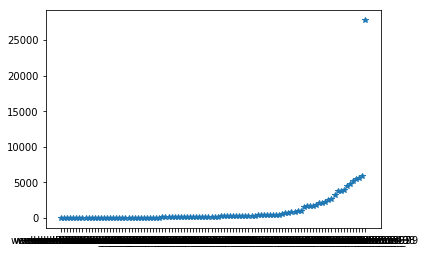

/home/haha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


100

In [38]:
ct = [each for each in join_data.columns if 'weekendDuration_' in each]
tempplot =  join_data[ct].describe().ix['mean']
print(len(tempplot))
tempplot.values.sort()
plt.plot(tempplot,'*')
plt.show()
temp = join_data[ct].describe().ix['mean']<0.1
selected = [each for each in temp.index if temp[each]==False]
len(selected)

In [39]:
for tag in ['weekendDuration_','weekdayDuration_','weekendTimes_','weekdayTimes_']:
    ct = [each for each in join_data.columns if tag in each]
    for each in ct:
        a = 0.25
        iqr = join_data[each].quantile(1-a) - join_data[each].quantile(a)
        q_abnormal_L = join_data[each].quantile(a) - 1.5 * iqr
        q_abnormal_U = join_data[each].quantile(1-a) + 1.5 * iqr
        if q_abnormal_L==q_abnormal_U:
            del join_data[each]
        else:
            join_data[each+'_rate'] = join_data[each]
            join_data[each][join_data[each]<=q_abnormal_L] = q_abnormal_L
            join_data[each][join_data[each]>=q_abnormal_U] = q_abnormal_U
            join_data[each] = pd.cut(join_data[each], bins=3, labels=['a','b','c'])
            join_data = pd.get_dummies(join_data,columns=[each])

/home/haha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/home/haha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [40]:
for tag in ['weekendDuration_','weekdayDuration_','weekendTimes_','weekdayTimes_']:
    join_data[tag[:-1]+'Sum'] = 0
    print(tag[:-1]+'Sum')
    for each in [each for each in join_data.columns if tag in each and 'rate' in each]:
#         print(each)
        join_data[tag[:-1]+'Sum'] += join_data[each]
#         break

weekendDurationSum
weekdayDurationSum
weekendTimesSum
weekdayTimesSum


In [41]:
for tag in ['weekendDuration_','weekdayDuration_','weekendTimes_','weekdayTimes_']:
    ct = [each for each in join_data.columns if tag in each and 'rate' in each]
#     print(ct[-1])
    for each in ct:
#         print(each.split('_')[0]+'Sum')
#         break
        join_data[each] = join_data[each]/join_data[each.split('_')[0]+'Sum']

In [42]:
name = 'weekdayTimesSum'
join_data[name][join_data[name]>=40000] = 40000
join_data[name] = pd.cut(join_data[name], bins=6, labels=['a', 'b', 'c', 'd', 'e','f'])
join_data = pd.get_dummies(join_data,columns=[name])

/home/haha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [43]:
name = 'weekendTimesSum'
join_data[name][join_data[name]>=12000] = 12000
join_data[name] = pd.cut(join_data[name], bins=6, labels=['a', 'b', 'c', 'd', 'e','f'])
join_data = pd.get_dummies(join_data,columns=[name])

/home/haha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [44]:
name = 'weekdayDurationSum'
join_data[name][join_data[name]>=800000] = 800000
join_data[name] = pd.cut(join_data[name], bins=6, labels=['a', 'b', 'c', 'd', 'e','f'])
join_data = pd.get_dummies(join_data,columns=[name])

/home/haha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [45]:
name = 'weekendDurationSum'
join_data[name][join_data[name]>=300000] = 300000
join_data[name] = pd.cut(join_data[name], bins=6, labels=['a', 'b', 'c', 'd', 'e','f'])
join_data = pd.get_dummies(join_data,columns=[name])

/home/haha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [46]:
age_train = pd.read_csv('./csv_data/age_train.csv',header=None)
age_train.columns = ['uId','age_group']
age_test = pd.read_csv('./csv_data/age_test.csv',header=None)
age_test.columns = ['uId']

In [47]:
age_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502500 entries, 0 to 502499
Data columns (total 1 columns):
uId    502500 non-null int64
dtypes: int64(1)
memory usage: 3.8 MB


In [48]:
join_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992578 entries, 0 to 1992577
Columns: 633 entries, uId to weekendDurationSum_f
dtypes: float32(191), int64(2), uint32(1), uint8(439)
memory usage: 2.3 GB


In [49]:
with open('join.data1.pkl','wb') as f:
    pickle.dump(join_data,f)

In [50]:
train_data = pd.merge(join_data,age_train,on=['uId'],how='inner')
test_data = pd.merge(age_test,join_data,on=['uId'],how='left')

In [51]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1594068 entries, 0 to 1594067
Columns: 634 entries, uId to age_group
dtypes: float32(191), int64(3), uint32(1), uint8(439)
memory usage: 1.8 GB


In [52]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502500 entries, 0 to 502499
Columns: 633 entries, uId to weekendDurationSum_f
dtypes: float32(191), float64(441), int64(1)
memory usage: 2.0 GB


In [53]:
train_data = optimize_mem(train_data)
test_data = optimize_mem(test_data)

1883.55 MB
1851.63 MB
2064.49 MB
1217.22 MB


In [54]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1594068 entries, 0 to 1594067
Columns: 634 entries, uId to age_group
dtypes: float32(191), uint32(1), uint8(442)
memory usage: 1.8 GB


In [55]:
train_data.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1538239 entries, 0 to 1594067
Columns: 634 entries, uId to age_group
dtypes: float32(191), uint32(1), uint8(442)
memory usage: 1.7 GB


In [56]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502500 entries, 0 to 502499
Columns: 633 entries, uId to weekendDurationSum_f
dtypes: float32(632), uint32(1)
memory usage: 1.2 GB


In [57]:
test_data.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384737 entries, 0 to 502497
Columns: 633 entries, uId to weekendDurationSum_f
dtypes: float32(632), uint32(1)
memory usage: 932.0 MB


In [58]:
float_feature = [each for each in join_data.columns if join_data[each].dtypes=='float32']

In [59]:
train_data.head()

,uId,gender,prodName_p001,prodName_p0010,prodName_p00100,prodName_p00102,prodName_p00103,prodName_p00105,prodName_p00106,prodName_p00107,...,weekdayDurationSum_d,weekdayDurationSum_e,weekdayDurationSum_f,weekendDurationSum_a,weekendDurationSum_b,weekendDurationSum_c,weekendDurationSum_d,weekendDurationSum_e,weekendDurationSum_f,age_group
0,1000001,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,4
1,1000015,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,5
2,1000023,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2
3,1000025,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,4
4,1000029,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,4


In [60]:
list(train_data.columns)

['uId',
 'gender',
 'prodName_p001',
 'prodName_p0010',
 'prodName_p00100',
 'prodName_p00102',
 'prodName_p00103',
 'prodName_p00105',
 'prodName_p00106',
 'prodName_p00107',
 'prodName_p00108',
 'prodName_p0011',
 'prodName_p00110',
 'prodName_p00112',
 'prodName_p0013',
 'prodName_p00136',
 'prodName_p00137',
 'prodName_p00139',
 'prodName_p0014',
 'prodName_p00141',
 'prodName_p00142',
 'prodName_p00143',
 'prodName_p00144',
 'prodName_p00145',
 'prodName_p00147',
 'prodName_p0015',
 'prodName_p00153',
 'prodName_p00155',
 'prodName_p00156',
 'prodName_p00158',
 'prodName_p0016',
 'prodName_p00165',
 'prodName_p00169',
 'prodName_p0017',
 'prodName_p00171',
 'prodName_p0018',
 'prodName_p00199',
 'prodName_p002',
 'prodName_p00200',
 'prodName_p00201',
 'prodName_p00208',
 'prodName_p00209',
 'prodName_p00210',
 'prodName_p00211',
 'prodName_p00212',
 'prodName_p00213',
 'prodName_p00217',
 'prodName_p0022',
 'prodName_p00223',
 'prodName_p00224',
 'prodName_p00225',
 'prodName_p00

In [61]:
with open('train.data1.pkl','wb') as f:
    pickle.dump(train_data,f)
with open('test.data1.pkl','wb') as f:
    pickle.dump(test_data,f)